# BACTERIA

In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

In [3]:
#import packages
import os
import qiime2 as q2
import pandas as pd
from qiime2.plugins import feature_table
from qiime2.plugins.taxa.methods import collapse
from qiime2.plugins.feature_table.visualizers import core_features

In [4]:
# define workdir
%env WORKDIR /home/nezapa/qiime-thesis
WORKDIR = os.environ.get("WORKDIR")

env: WORKDIR=/home/nezapa/qiime-thesis


In [5]:
# import data
denoisetable_ba = q2.Artifact.load('./results/denoisetable_ba.qza')
rep_seqs_ba = q2.Artifact.load('./results/rep_seqs_ba.qza')
denoising_stats = q2.Artifact.load('./results/denoising_stats.qza')
sample_metadata = q2.Metadata.load('../00.sample-metadata.tsv')
taxonomy = q2.Artifact.load('./results/taxonomy_sklearn.qza')

### CORE MICROBIOME

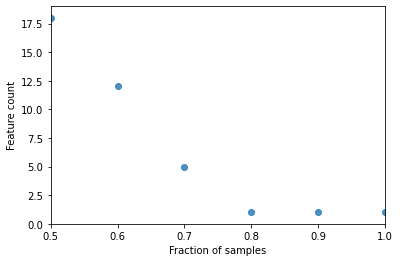

In [6]:
core_microbiome_asv = feature_table.actions.core_features(
    table = denoisetable_ba,
    min_fraction = 0.5,
    steps = 6
)

In [7]:
taxtable ={}

for level in range(2,8):
    result = collapse(
        table = denoisetable_ba,
        taxonomy = taxonomy,
        level = level
    )
    taxtable[level] = result.collapsed_table

In [12]:
taxtable[6].view(pd.DataFrame)

,d__Bacteria;__;__;__;__;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Chromobacteriaceae;g__Vogesella,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Comamonadaceae;g__Paucibacter,d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__MND1,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Cytophagales;f__Spirosomaceae;g__Emticicia,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus,d__Bacteria;p__Planctomycetota;c__Phycisphaerae;o__Tepidisphaerales;f__WD2101_soil_group;g__WD2101_soil_group,d__Bacteria;p__Myxococcota;c__Polyangia;o__Haliangiales;f__Haliangiaceae;g__Haliangium,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Oceanospirillales;f__Pseudohongiellaceae;g__BIyi10,...,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Comamonadaceae;g__Comamonas,d__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Bacillaceae;g__Geobacillus,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Chthoniobacterales;f__Chthoniobacteraceae;g__Chthoniobacter,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Marinifilaceae;g__Odoribacter,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Comamonadaceae;g__Rhizobacter,d__Bacteria;p__Proteobacteria;__;__;__;__,d__Bacteria;p__Planctomycetota;c__Planctomycetes;o__Pirellulales;f__Pirellulaceae;g__Pirellula,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rickettsiales;f__Mitochondria;g__Mitochondria,d__Bacteria;p__Firmicutes;c__Clostridia;o__Peptostreptococcales-Tissierellales;f__Peptostreptococcaceae;g__Romboutsia
P01A,367.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P03A,323.0,0.0,0.0,0.0,0.0,134.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,133.0,0.0,0.0,29.0,0.0
P05A,303.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P07A,244.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,47.0,26.0,0.0,0.0,0.0
P09A,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P11A,298.0,97.0,998.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0
P13A,169.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,239.0,1091.0,...,0.0,5.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P15A,118.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
P17A,809.0,0.0,0.0,91.0,0.0,0.0,102.0,38.0,0.0,0.0,...,0.0,5.0,0.0,124.0,33.0,0.0,0.0,0.0,0.0,5.0
P19A,317.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0


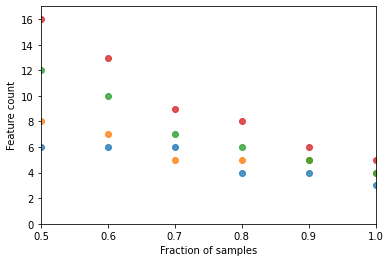

In [16]:
core_microbiome ={}

for level in range(2,6):
    result = core_features(
        table = taxtable[level],
        min_fraction = 0.5,
        steps = 6
    )
    core_microbiome[level] = result.visualization